In [1]:
exp_name = 'codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java'
sf = f'src/{exp_name}.jsonl'
td = f'tgt/{exp_name.replace("-", "")}'
!python convert_to_pre_eval.py --source_file $sf --target_dir $td


Done.



100%|██████████| 16000/16000 [00:00<00:00, 889094.65jsonline/s]


In [2]:
# import subprocess
sf = f'src/{exp_name}.jsonl'
td = f'tgt/{exp_name.replace("-", "")}'
eval_cmd = f"podman run --rm --network none -v ./{td}:/{td}:rw multipl-e-eval --dir /{td} --output-dir /{td} --recursive"


# # subprocess.run(eval_cmd, shell=True)
print("### EVALUATION COMMAND ###")
print('#',eval_cmd)
print("### EVALUATION COMMAND ###")


### EVALUATION COMMAND ###
# podman run --rm --network none -v ./tgt/codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java:/tgt/codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java:rw multipl-e-eval --dir /tgt/codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java --output-dir /tgt/codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java --recursive
### EVALUATION COMMAND ###


In [ ]:
### EVALUATION COMMAND ###
# podman run --rm --network none -v ./tgt/codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java:/tgt/codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java:rw multipl-e-eval --dir /tgt/codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java --output-dir /tgt/codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java --recursive
### EVALUATION COMMAND ###

In [14]:
sf = f'src/{exp_name}.jsonl'
td = f'tgt/{exp_name.replace("-", "")}'
target_dir = f'{td}'
output_file = f'res/{exp_name}_results.json'
!python pass_k.py $target_dir --output $output_file

Dataset,Pass@k,Estimate,NumProblems,MinCompletions,MaxCompletions
Reading results from tgt/codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py...
And saving results to res/codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py_results.json...
For file tgt\codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py\HumanEval_22_filter_integers.results.json n = 200 and c = 2
For file tgt\codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py\HumanEval_23_strlen.results.json n = 200 and c = 4
For file tgt\codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py\HumanEval_29_filter_by_prefix.results.json n = 200 and c = 4
For file tgt\codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py\HumanEval_30_get_positive.results.json n = 200 and c = 6
For file tgt\codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py\HumanEval_35_max_element.results.json n = 200 and c = 3
For file tgt\codegne_finetuned_the_stack_java_v2_checkpoint_200_hu

#### Visualize the results

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


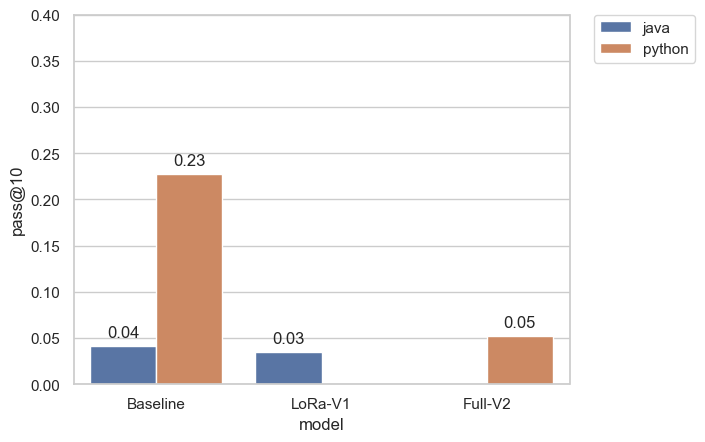

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


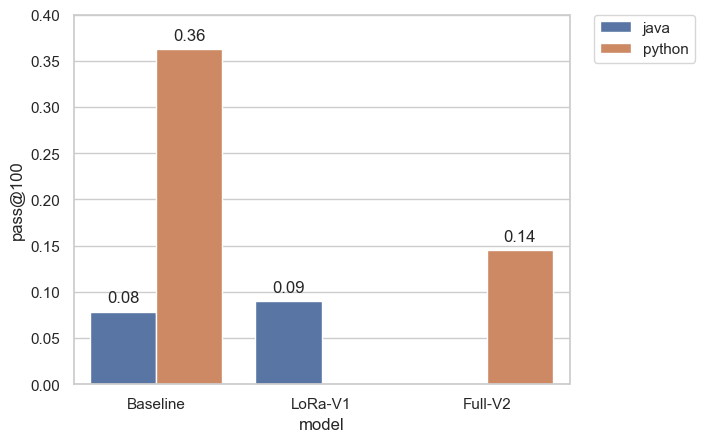

In [11]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


#get all the results files in the res folder
results_files = [f for f in os.listdir('res') if os.path.isfile(os.path.join('res', f))]

#load all the results files into a dictionary
results = {}
for f in results_files:
    with open(os.path.join('res', f)) as json_file:
        results[f] = json.load(json_file)

#Models Short Names
model_names_dict = {
    'codegen_350M_mono_humaneval_py': 'Baseline',
    'codegen_350M_mono_humaneval_java': 'Baseline',

    'codegen_350M_mono_the_stack_dedup_java_train_peft_humaneval_py': 'LoRa-V1',
    'codegen_350M_mono_the_stack_dedup_java_train_peft_humaneval_java': 'LoRa-V1',
    
    'codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py': 'Full-V2',
    'codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java': 'Full-V2',
    
    'codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_200_humaneval_py': 'LoRa-V2',
    'codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_200_humaneval_java': 'LoRa-V2'

}


#Merge all the results into a single dataframe
dict_df = {
    'model': [],
    'dataset': [],
    'pass@10': [],
    'pass@100': [],
    'num_problems': [],
    'min_completions': [],
    'max_completions': [],
    'programming_language': []
}

for model in results.keys():
    model_results = results[model]
    model_name = model.split('_results.json')[0]
    if model_name in model_names_dict.keys():
        model_name = model_names_dict[model_name]
    dataset_name = model_results['pass@10']['dataset']
    pass_10 = model_results['pass@10']['estimate']
    pass_100 = model_results['pass@100']['estimate']
    num_problems = model_results['pass@10']['num_problems']
    min_completions = model_results['pass@10']['min_completions']
    max_completions = model_results['pass@10']['max_completions']
    if 'humaneval_py' in dataset_name:
        programming_language = 'python'
    elif 'humaneval_java' in dataset_name:
        programming_language = 'java'
    else:
        programming_language = 'unknown'
    dict_df['model'].append(model_name)
    dict_df['dataset'].append(dataset_name)
    dict_df['pass@10'].append(pass_10)
    dict_df['pass@100'].append(pass_100)
    dict_df['num_problems'].append(num_problems)
    dict_df['min_completions'].append(min_completions)
    dict_df['max_completions'].append(max_completions)
    dict_df['programming_language'].append(programming_language)

df = pd.DataFrame(dict_df)

#Drop the dataset column
df = df.drop(columns=['dataset'])

#Drop the min_completions and max_completions columns
df = df.drop(columns=['min_completions', 'max_completions'])

#Drop the num_problems column
df = df.drop(columns=['num_problems'])

#Plot the results
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="pass@10", hue="programming_language", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
#set the y axis to start at 0 and end at 0.4
plt.ylim(0, 0.4)
#writer the y values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.01,
            '{:1.2f}'.format(height),
            ha="center")
#plot the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Plot the results
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="pass@100", hue="programming_language", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
#set the y axis to start at 0 and end at 0.4
plt.ylim(0, 0.4)
#writer the y values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.01,
            '{:1.2f}'.format(height),
            ha="center")
#plot the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [25]:
df

,model,pass@10,pass@100,programming_language
0,codegen_350M_mono_humaneval_java,0.041230,0.078607,java
1,codegen_350M_mono_humaneval_py,0.227251,0.362420,python
2,codegen_350M_mono_the_stack_dedup_java_train_p...,0.034939,0.089892,java
3,codegne_finetuned_the_stack_java_v2_checkpoint...,0.052167,0.144856,python


In [28]:
df.model.unique()

array(['codegen_350M_mono_humaneval_java',
       'codegen_350M_mono_humaneval_py',
       'codegen_350M_mono_the_stack_dedup_java_train_peft_humaneval_java',
       'codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py'],
      dtype=object)